<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4_%EA%B8%B0%EC%B6%9C%EB%AA%A8%EC%9D%983%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제3회 기출동형 모의고사

In [5]:
!git clone https://github.com/ADPclass/ADP_book_ver01.git

Cloning into 'ADP_book_ver01'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 172 (delta 36), reused 61 (delta 19), pack-reused 81 (from 1)
Receiving objects: 100% (172/172), 17.54 MiB | 10.31 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [23]:
# Required Module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# 모든 경고 무시 (원하는 경우)
warnings.filterwarnings('ignore')

In [50]:
import matplotlib.pyplot as plt
from matplotlib import rcdefaults  # rcdefaults를 올바르게 임포트
import warnings

# 모든 경고 무시 (원하는 경우)
warnings.filterwarnings('ignore')

# matplotlib 설정을 기본값으로 리셋
rcdefaults()

# 기계학습

## 1.(1) 데이터 탐색 결과 제시

In [7]:
# Raw Data Loading
raw_df = pd.read_csv('/content/ADP_book_ver01/data/hotel_bookings.csv')
display(raw_df.head())
display(raw_df.info())
# 총 20000개의 관측치와 11개의 변수가 있다.
# 독립변수에서 deposit_type만 문자형이고, 나머지는 모두 수치형이다.

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


None

In [8]:
# 결측치 탐색
display(raw_df.isnull().sum())
display(raw_df.isnull().sum().sum())
# 결측치가 있는 변수는 3개이며
# 결측치 개수는 총 1,426개이다.

,0
is_canceled,0
deposit_type,0
lead_time,5
stays_in_weekend_nights,0
stays_in_week_nights,0
is_repeated_guest,358
previous_cancellations,0
previous_bookings_not_canceled,0
booking_changes,0
days_in_waiting_list,0


1426

In [9]:
# 데이터 타입
# 종속변수
display(raw_df['is_canceled'].value_counts())
count_0 = len(raw_df[raw_df['is_canceled']==0])
count_1 = len(raw_df[raw_df['is_canceled']==1])
ratio_1 = (count_1 / (count_0 + count_1)) * 100
print(ratio_1, '%')
# 종속변수는 0과 1로 이루어진 이진변수(binary)이며
# 1의 비율은 전체의 12.0% 이므로 불균형한 데이터이다.

,count
is_canceled,
0,17600
1,2400


12.0 %


In [10]:
# 데이터 타입
# 범주형 독립변수
display(raw_df['deposit_type'].value_counts())
# 독립변수 중 deposit_type의 클래스는 3개로서
# 모델링을 위해서는 인코딩이 필요하다

,count
deposit_type,
No Deposit,19138
Non Refund,834
Refundable,28


In [11]:
# 데이터 타입
# 연속형 독립변수
display(raw_df.describe())
# Tukey's Fences 방식에서의 이상치는 IQR(75% 사분위수 - 25% 사분위수) X 1.5를 벗어난 값이다.
# 이 방식으로 확인했을 때, 다수의 독립변수에서 이상치를 의심해 볼 수 있다.

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
mean,0.12000,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.00000,629.000000,13.000000,30.000000,1.000000,26.000000,66.000000,17.000000,379.000000,451.500000


## 1.(2). 결측치 탐색 / 대체 방법 및 근거

In [12]:
# 1. 결측치 탐색
raw_df.isnull().sum()

,0
is_canceled,0
deposit_type,0
lead_time,5
stays_in_weekend_nights,0
stays_in_week_nights,0
is_repeated_guest,358
previous_cancellations,0
previous_bookings_not_canceled,0
booking_changes,0
days_in_waiting_list,0


In [15]:
# 2. 결측치 대체 방법
# 1) lead_time
print(f'lead_time 결측치 비율 : {round(5/len(raw_df)*100, 2)}%')
# lead_time의 결측치는 0.03% 로 미미하므로 삭제한다.

df = raw_df.dropna(subset=['lead_time'], axis = 0)
display(df.shape)

# 2) is_repeated_guest
display(df['is_repeated_guest'].value_counts())
# 이진형 변수이기 때문에 최빈값으로 대체한다.
# 결측치(NaN)를 0으로 대체할 때 loc 사용
df.loc[df['is_repeated_guest'].isnull(), 'is_repeated_guest'] = 0
print('is_repeated_guest 결측치 : ', df['is_repeated_guest'].isnull().sum())

# adr 변수는 average daily rate 로서 고객이 하루에 지불한 평균 요금을 나타낸다
# 연속형 변수이기 때문에 평균대치법을 사용한다
# adr 평균을 구한다
adr_mean = df['adr'].mean()
print('adr 평균 : ', adr_mean)
# 결측치를 adr 평균으로 대체
df['adr'] = df['adr'].fillna(adr_mean)
print('adr 결측치 : ', df['adr'].isnull().sum())

# 결측치 대체 확인
display(df.isna().sum())
display(df.shape)

lead_time 결측치 비율 : 0.03%


(19995, 11)

,count
is_repeated_guest,
0.0,18888
1.0,749


is_repeated_guest 결측치 :  0
adr 평균 :  101.41070198605536
adr 결측치 :  0


,0
is_canceled,0
deposit_type,0
lead_time,0
stays_in_weekend_nights,0
stays_in_week_nights,0
is_repeated_guest,0
previous_cancellations,0
previous_bookings_not_canceled,0
booking_changes,0
days_in_waiting_list,0


(19995, 11)

## 1.(3). 데이터 질을 향상시키는 방법 제안

In [ ]:
# 1) 이상치들을 적절히 보정해주어 극단적인 값들을 제거해 준다면
# 모델에서 특정값들이 영향을 주는 경우를 방지할 것이다.

# 2) 독립변수 is_repeated_guest	의 1에 해당하는 데이터를 더 수집해 준다면
# 해당 변수의 불균형을 해소하여 변수 중요도를 증가시켜 줄 것이다.

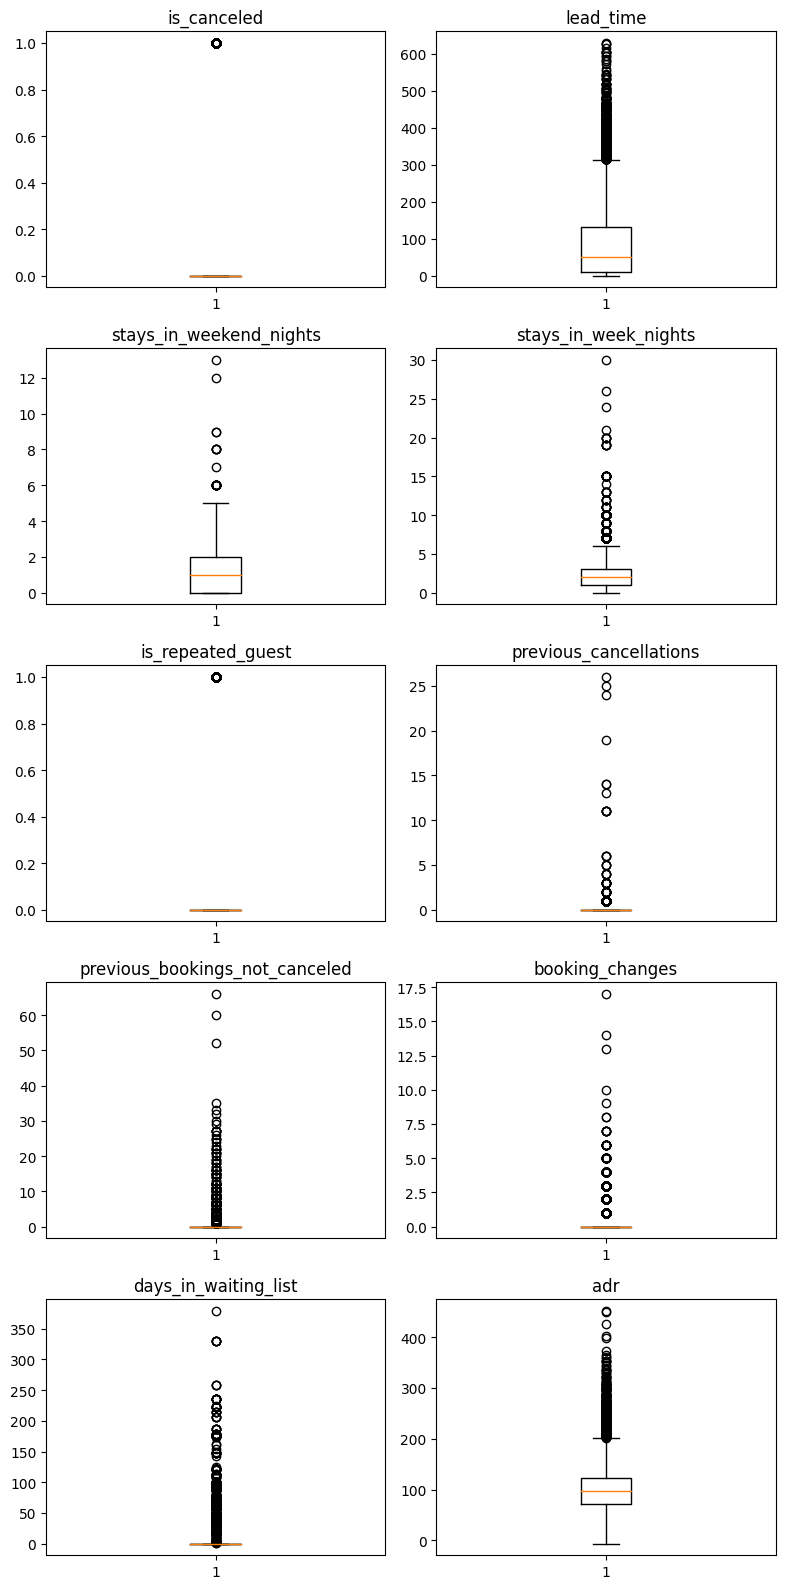

,count
is_repeated_guest,
0.0,19246
1.0,749


In [16]:
# 2. 이상치 탐색 (범주형 변수인 deposit_type 제외)
# 1)도화지 준비
fig = plt.figure(figsize=(8,16))
# 2)위치 잡고
fig_is_canceled = fig.add_subplot(5,2,1)
fig_lead_time = fig.add_subplot(5,2,2)
fig_stays_in_weekend_nights = fig.add_subplot(5,2,3)
fig_stays_in_week_nights = fig.add_subplot(5,2,4)
fig_is_repeated_guest = fig.add_subplot(5,2,5)
fig_previous_cancellations = fig.add_subplot(5,2,6)
fig_previous_bookings_not_canceled	= fig.add_subplot(5,2,7)
fig_booking_changes = fig.add_subplot(5,2,8)
fig_days_in_waiting_list = fig.add_subplot(5,2,9)
fig_adr = fig.add_subplot(5,2,10)
# 3)밸류 밀어 넣고
fig_is_canceled.boxplot(df['is_canceled'].values)
fig_lead_time.boxplot(df['lead_time'].values)
fig_stays_in_weekend_nights.boxplot(df['stays_in_weekend_nights'].values)
fig_stays_in_week_nights.boxplot(df['stays_in_week_nights'].values)
fig_is_repeated_guest.boxplot(df['is_repeated_guest'].values)
fig_previous_cancellations.boxplot(df['previous_cancellations'].values)
fig_previous_bookings_not_canceled.boxplot(df['previous_bookings_not_canceled'].values)
fig_booking_changes.boxplot(df['booking_changes'].values)
fig_days_in_waiting_list.boxplot(df['days_in_waiting_list'].values)
fig_adr.boxplot(df['adr'].values)
# 4)제목 쓰고
fig_is_canceled.set_title('is_canceled')
fig_lead_time.set_title('lead_time')
fig_stays_in_weekend_nights.set_title('stays_in_weekend_nights')
fig_stays_in_week_nights.set_title('stays_in_week_nights')
fig_is_repeated_guest.set_title('is_repeated_guest')
fig_previous_cancellations.set_title('previous_cancellations')
fig_previous_bookings_not_canceled.set_title('previous_bookings_not_canceled')
fig_booking_changes.set_title('booking_changes')
fig_days_in_waiting_list.set_title('days_in_waiting_list')
fig_adr.set_title('adr')
# 5)그림 출력
fig.tight_layout()
plt.show()

# 이진형 독립 변수들인 is_repeated_guest를 제외하고
# 모든 수치형 독립 변수들에서 이상치가 발견되는 바
# 적절한 값으로 보정해 준다면 모델에 특정값이 영향을 주는 경우를 방지할 수 있을 것이다.

display(df['is_repeated_guest'].value_counts())
# 독립변수인 is_canceled에서 "1"에 해당하는 데이터를 좀 더 수집해
# 데이터 불균형을 해소해 준다면 모델이 더 안정적일 것이다.

## 1.(4). 데이터 불균형 시각화 식별, 불균형 판단 근거

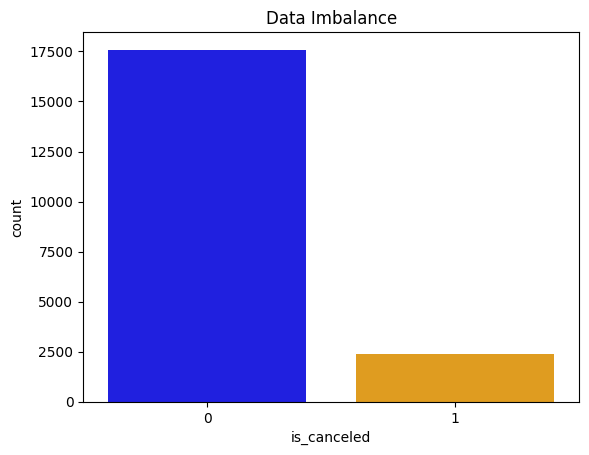

0의 비율 : 88.0%
1의 비율 : 12.0%


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_canceled', data=df, palette=['blue', 'orange'])
plt.title('Data Imbalance')
plt.show()

ratio_0 = round(len(df[df['is_canceled'] == 0])/len(df)* 100, 2)
print(f'0의 비율 : {ratio_0}%')
ratio_1 = round(len(df[df['is_canceled'] == 1])/len(df)* 100, 2)
print(f'1의 비율 : {ratio_1}%')

## 1.(5). 오버 샘플링 기법 설명 및 2개 기법 선정하고 근거 제시

In [ ]:
# 오버샘플링 기법은 소수 클래스를 가진 데이터세트를
# 다수 클래스를 가진 데이터세트의 수만큼 증식시켜
# 학습에 충분한 데이터를 확보하는 기법이다.
#
# 1) Random Oversampling
# 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식한다
# 데이터를 단순 복사하는 방식이므로 기존의 데이터와 동일한 복제 데이터를 생성한다
# 장점 : 사용방법이 간단하다
# 단점 : 소수 클래스에 과적합이 발생할 가능성이 있다
#
# 2) SMOTE (Synthetic Minority Oversampling Technique)
# 소수 클래스에 속하는 개별 데이터들의 k-최근접 이웃을 찾아,
# 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어
# 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다.
# 장점 : 과적합 문제를 예방할 수 있다
# 단점 : Random Oversampling 보다 처리속도가 느리다

## 1.(6). 원데이터를 포함한 3개 데이터 세트 구성

In [47]:
# 오버 샘플링 방식으로 Random Oversampling과 SMOTE를 선택한다.
# Random Oversampling은 간단한 방식으로 데이터 불균형 문제를 해결할 수 있고,
# SMOTE는 데이터를 생성할 때 과적합 문제를 방지할 수 있다는 점에서 선택하였다.
from imblearn.over_sampling import RandomOverSampler, SMOTE

# 먼저 object형태의 독립변수인 deposit_type을 수치형으로 변환한다.
# deposit_type_mapping = {
#     'No Deposit' : 0,
#     'Non Refund' : 1,
#     'Refundable' : 2
# }
# df['deposit_type'] = df['deposit_type'].map(deposit_type_mapping)
# display(df.head())

# 먼저 object형태의 독립변수인 deposit_type을 수치형으로 변환한다.
one_hot_encoded_df = pd.get_dummies(df, columns=['deposit_type'], prefix='deposit')

## 원본 데이터
X = one_hot_encoded_df.drop('is_canceled', axis=1, inplace=False)
y = one_hot_encoded_df['is_canceled']

## Random Oversampling
ros = RandomOverSampler(random_state = 42)
X_ros, y_ros = ros.fit_resample(X, y)

# SMOTE
smt = SMOTE(random_state = 42)
X_smt, y_smt = smt.fit_resample(X, y)

## 1.(7). 원데이터와 오버샘플링 데이터를 사용해 정확도 측면 모델 1개와 속도 측면 모델 1개를 선정하고 이유 설명

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import time

# 원데이터
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 42)

# 원데이터 : 랜덤포레스트
start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print('원데이터 : 랜덤포레스트')
print(classification_report(y_test, pred))
print('time : ', time.time() - start)
print('-' * 50)

원데이터 : 랜덤포레스트
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3519
           1       0.80      0.45      0.57       480

    accuracy                           0.92      3999
   macro avg       0.87      0.72      0.76      3999
weighted avg       0.91      0.92      0.91      3999

time :  1.794384479522705
--------------------------------------------------


In [53]:
# SMOTE
X_smt_train, X_smt_test, y_smt_train, y_smt_test = train_test_split(X_smt, y_smt,
                                                    test_size = 0.2,
                                                    stratify = y_smt,
                                                    random_state = 42)

# SMOTE : 랜덤포레스트
start = time.time()
rf_smt = RandomForestClassifier()
rf_smt.fit(X_smt_train, y_smt_train)
pred = rf_smt.predict(X_smt_test)
print('SMOTE : 랜덤포레스트')
print(classification_report(y_smt_test, pred))
print('time : ', time.time() - start)
print('-' * 50)

SMOTE : 랜덤포레스트
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3519
           1       0.91      0.89      0.90      3519

    accuracy                           0.90      7038
   macro avg       0.90      0.90      0.90      7038
weighted avg       0.90      0.90      0.90      7038

time :  4.603839635848999
--------------------------------------------------


In [54]:
# Random Oversampling
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros,
                                                    test_size = 0.2,
                                                    stratify = y_ros,
                                                    random_state = 42)

# Random Oversampling : 랜덤포레스트
start = time.time()
rf_ros = RandomForestClassifier()
rf_ros.fit(X_ros_train, y_ros_train)
pred = rf_ros.predict(X_ros_test)
print('Random Oversampling : 랜덤포레스트')
print(classification_report(y_ros_test, pred))
print('time : ', time.time() - start)
print('-' * 50)

# 속도와 정확도 측면 모두 Random OverSampling 이
# SMOTE 보다 좋다.

Random Oversampling : 랜덤포레스트
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3519
           1       0.94      1.00      0.97      3519

    accuracy                           0.97      7038
   macro avg       0.97      0.97      0.97      7038
weighted avg       0.97      0.97      0.97      7038

time :  2.840172290802002
--------------------------------------------------


## 1.(8). 원데이터와 오버샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향 작성

In [ ]:
# test 데이터로 랜덤포레스트 모델의 최종 성능을 비교해 보면 오버샘플링이 분석정확도에서
# 더 긍정적인 영향을 주었다는 것을 알 수 있다.
# 원데이터로 측정한 모델의 정확도 성능은
# macro average가 76%, weighted average가 91% 였다.
# Random OverSampling에서는
# macro average가 97%, weighted average가 97% 로 높아졌다.
# 따라서 오버샘플링 처리를 한 예측모델이
# 일반샘플링보다 훨씬 나은 결과값을 가져다 줌을 알 수 있다.

# 통계분석

## 1.(1) 연구가설, 귀무가설을 작성하시오.

In [ ]:
# 귀무가설 : 시제품 샘플 농도는 평균 60(%)이다.
# 연구가설=대립가설 : 시제품 샘플 농도는 평균 60(%)가 아니다.

## 1.(2) 유효한 샘플의 수를 계산하시오.

In [67]:
# 위 가설을 검정하기 위해서는 단일표본 t-test가 가장 적합하다.
# 그러나 단일표본 t-test를 하기 위해서는 정규분포를 따른다는 가정이 필요한데,
# 샘플의 개수가 10개로 크기가 작아 정규성 검정을 할 수 없다.
# 정규 분포가 아니므로 비모수 분석의 부호검정(wilcoxon test)을 실시해야 할 것이다

# 유효한 샘플의 수를 계산하는 것은 최소 표본 크기를 계산하는 것이다
# 최소 표본 크기를 계산하기 위해서는
# 유의수준(alpha) 0.05, 검정력(power) 0.8, 효과의 크기(effect size) 0.5 등의 가정이 필요하다.

from statsmodels.stats.power import TTestPower
# 변수 설정
alpha = 0.05  # 유의수준
power = 0.8   # 검정력
effect_size = 0.5 # 효과의 크기(중간 정도)

# T-검정 최소 표본 크기 계산
analysis = TTestPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
print(round(sample_size, 2))

# 정규성 검정을 하기 위해서는 최소 33.37개, 즉 34개가 필요하다.

33.37


In [64]:
# 정규성 검정을 하기 위해서는 최소 30개이상의 샘플이 필요하다.
from scipy.stats import shapiro
data = [52,50,62,75,26,45,62,35,57,14]
shapiro(data)
# pvalue가 유의수준 0.05 보다 크므로 귀무가설을 채택한다.
# 즉, 정규분포라고 할 수 있다.

ShapiroResult(statistic=0.9657646385356276, pvalue=0.8490421818960987)

## 1.(3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

In [69]:
# 정규성 검정을 할 수 없으므로
# Wilcoxon의 부호검정을 검정방법으로 선택한다
from scipy.stats import wilcoxon
mu = 60
data_array = np.array(data)
wilcoxon(data_array - mu, alternative='two-sided')

# pvalue가 유의수준 0.05보다 크므로 귀무가설을 채택한다.
# 즉, 시제품 샘플농도는 평균 60%라고 할 수 있다.
# 따라서 연구가설을 기각한다.

WilcoxonResult(statistic=9.5, pvalue=0.064453125)

## 2.(1) ACF를 사용해서 distance를 계산하시오

In [77]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/ADP_book_ver01/data/서울특별시 코로나19.csv')
display(data.head())
display(data.info())

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      785 non-null    object
 1   종로구     785 non-null    int64 
 2   중구      785 non-null    int64 
 3   용산구     785 non-null    int64 
 4   성동구     785 non-null    int64 
 5   광진구     785 non-null    int64 
 6   동대문구    785 non-null    int64 
 7   중랑구     785 non-null    int64 
 8   성북구     785 non-null    int64 
 9   강북구     785 non-null    int64 
 10  도봉구     785 non-null    int64 
 11  노원구     785 non-null    int64 
 12  은평구     785 non-null    int64 
 13  서대문구    785 non-null    int64 
 14  마포구     785 non-null    int64 
 15  양천구     785 non-null    int64 
 16  강서구     785 non-null    int64 
 17  구로구     785 non-null    int64 
 18  금천구     785 non-null    int64 
 19  영등포구    785 non-null    int64 
 20  동작구     785 non-null    int64 
 21  관악구     785 non-null    int64 
 22  서초구     785 non-null    in

None

In [ ]:
# ACF(자기상관계수, AutoCorrelation Function)

## 2.(2) 계층적 군집 분석을 위해 덴드로그램을 작성하시오

In [80]:
# 한글 폰트
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,824 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123605 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [94]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 파일 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
fontprop = fm.FontProperties(fname=font_path)

# 한글 폰트 설정
plt.rc('font', family=fontprop.get_name())
plt.rcParams['axes.unicode_minus'] = False

In [91]:
# 설치된 폰트 확인
fm.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf

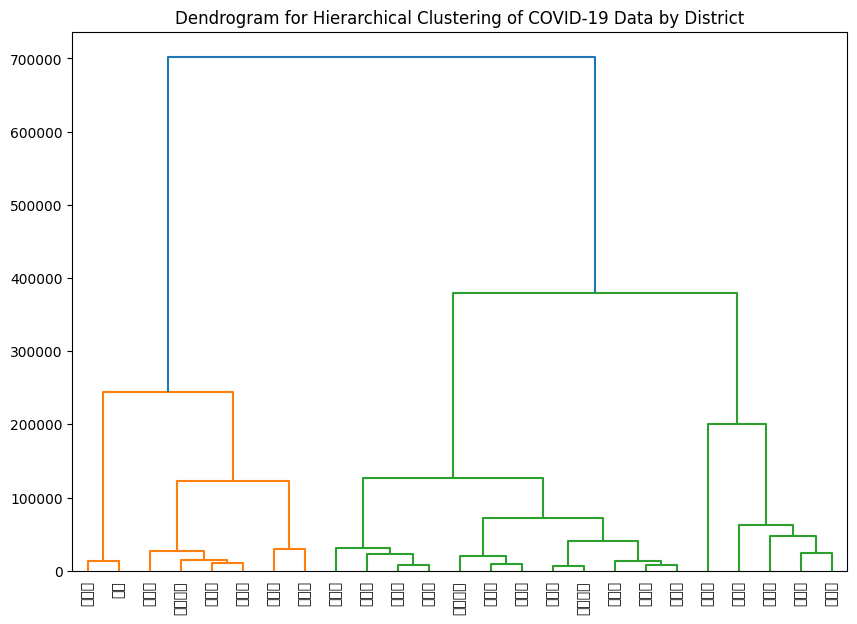

In [95]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 데이터에서 숫자형 변수들(구별 확진자 수)만 선택
numeric_data = data.drop(columns=['날짜']).values

# 데이터를 구별로 전치
transposed_data = numeric_data.T

# 계층적 군집 분석을 위한 링크 매트릭스 계산 (유클리드 거리 사용)
Z = linkage(transposed_data, method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering of COVID-19 Data by District")
dendrogram(Z, labels=data.columns[1:])
plt.xticks(rotation=90)
plt.show()

## 3.(1) 연구가설, 귀무가설을 작성하시오

In [97]:
table = pd.DataFrame({
    '사회과학' : [16,30,12],
    '자연과학' : [12,20,3],
    '공학' : [18,13,14],
}, index=['3.5~4.5', '2.5~3.5', '1.5~2.5'])

display(table)

,사회과학,자연과학,공학
3.5~4.5,16,12,18
2.5~3.5,30,20,13
1.5~2.5,12,3,14


In [ ]:
# 귀무가설 : 성적과 학과간에는 관련성이 없다
# 연구가설 : 성적과 학과간에는 관련성이 있다

## 3.(2) 학과와 성적이 독립일 때 기대값을 구하시오

In [103]:
from scipy.stats import chi2_contingency
# 관찰된 빈도와 기대되는 빈도가 의미있게 다른지를 검정하기 위해
# 카이제곱 독립성 검정 수행
chi2_contingency(table)
# 기대값
# expected_freq=array([[19.33333333, 11.66666667, 15.        ],
#        [26.47826087, 15.97826087, 20.54347826],
#        [12.1884058 ,  7.35507246,  9.45652174]]))

Chi2ContingencyResult(statistic=10.199441509990177, pvalue=0.03719883770303157, dof=4, expected_freq=array([[19.33333333, 11.66666667, 15.        ],
       [26.47826087, 15.97826087, 20.54347826],
       [12.1884058 ,  7.35507246,  9.45652174]]))

## 3.(3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오

In [102]:
# 검정통계량
# statistic=10.199441509990177
# pvalue=0.03719883770303157,
# pvalue가 유의수준 0.05보다 작으므로
# 귀무가설을 기각하고 연구가설을 채택한다.
# 따라서 성적과 학과 간에는 독립적이지 않고 관련성이 있다.

Chi2ContingencyResult(statistic=10.199441509990177, pvalue=0.03719883770303157, dof=4, expected_freq=array([[19.33333333, 11.66666667, 15.        ],
       [26.47826087, 15.97826087, 20.54347826],
       [12.1884058 ,  7.35507246,  9.45652174]]))